In [1]:
%load_ext autotime

In [2]:
import numpy as np, cv2, os, glob
from PIL import Image
import matplotlib.pyplot as plt
from multiprocessing import Process

In [3]:
OUT_DIR = "./data/preprocess/masks"

In [4]:
skin_masks = glob.glob('./data/CelebAMask-HQ/CelebAMask-HQ-mask-anno/**/*_skin.png')

In [5]:
def combine_skin_hair_mask(skin_masks, out_dir):
  for f in skin_masks:
    fname = f.split('_')[0]
    skin = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    skin = np.array(skin)//255 # mask value set to 1
    if os.path.exists(hair_f:=fname+'_hair.png'):
      hair = cv2.imread(hair_f, cv2.IMREAD_GRAYSCALE)
      hair = (np.array(hair)//255)*2 # new mask value set to 2
      
      # combine 2 masks, importance : hair
      res = np.maximum.reduce([skin, hair])
      out = os.path.join(out_dir, fname.split('/')[-1]) 
      cv2.imwrite(out+'.png', res)
    else:
      out = os.path.join(out_dir, fname.split('/')[-1])
      cv2.imwrite(out+'.png', skin)

In [6]:
if not os.path.exists(OUT_DIR):
  os.makedirs(OUT_DIR)
  # tweak the numbers if you have less cpu cores (current : 6)
  processes = [Process(target=combine_skin_hair_mask, 
                       args=(skin_masks[i*5000:(i+1)*5000], OUT_DIR)) for i in range(6)]
  [p.start() for p in processes]
  [p.join() for p in processes]
else:
  print("preprocessing directory already exists.")

Before we try to plot an output mask :  
keep in mind our pixel values are 0, 1, 2  
> 0 : background pixels  
> 1 : skin mask (face)  
> 2: hair mask  

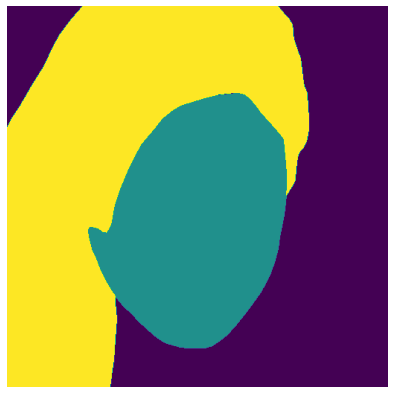

In [7]:
# let see how we can plot one of the masks
sample_mask = cv2.imread(OUT_DIR+'/08007.png',
                         cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(7, 7))
plt.axis('off')
plt.imshow(sample_mask*127);